In [1]:
# run this cell
import pandas as pd
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# <div align="center">Recap of Apply

**Created By: Edwin Vargas Navarro (jedwin321@berkeley.edu)**

# Table of Contents
1. Report 12 Notebook Questions:
    - Age Correction
    - House and Car Payments
<br/><br/>
2. Extracting Months
    - Str.split
    - Getting Month from year-month-day formate 
    - Convert Month Number to Month Name

## 1. Spotify Notebook Questions

<div class="alert alert-warning">
Now, we can see that the ages are wrong.
</div>

In [2]:
# create a table of people
data_2022 = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904),
    'Age', make_array(37, 34, 55, 1180),
    'Car Purchase', make_array(2020, 2005, 2003, 2019),
    'House Purchase', make_array(2007, 2013, 1990, 2021)
)
data_2022

Person,Birth Year,Age,Car Purchase,House Purchase
Jim,1985,37,2020,2007
Pam,1988,34,2005,2013
Michael,1967,55,2003,1990
Creed,1904,1180,2019,2021


## Age Correction

<div class="alert alert-warning">
    <b>PRACTICE:</b> Use <code>apply</code> and the function above to update the "Age" column in our table.
</div>

In [3]:
def find_age(year):
    "finds a person's age in the year 2022"
    return 2022 - year

In [4]:
new_ages = data_2022.apply(find_age, 'Birth Year')
data_2022 = data_2022.with_column('Age', new_ages)
data_2022

Person,Birth Year,Age,Car Purchase,House Purchase
Jim,1985,37,2020,2007
Pam,1988,34,2005,2013
Michael,1967,55,2003,1990
Creed,1904,118,2019,2021


## House and Car Payments

<div class="alert alert-warning">
    <b>PRACTICE:</b> Finally, let's create one more function. Suppose a car's yearly payment is \$5,000 regardless of when it was purchased, and a house's yearly payment is \$10,000 regardless of when it was purchased. Create <b>one</b> function that finds out how much an individual has paid since purchasing each item.
</div>

In [5]:
def payments(car, house):
    return (2022 - car) * 5000 + (2022 - house) * 10000

In [6]:
# call the function for an individual who...
# purchased a car in 2002 and a house in 2021
# what number should you get?
payments(2002, 2021)

110000

In [7]:
pay = data_2022.apply(payments, 'Car Purchase', 'House Purchase')
data_2022 = data_2022.with_column('Payments', pay)
data_2022

Person,Birth Year,Age,Car Purchase,House Purchase,Payments
Jim,1985,37,2020,2007,160000
Pam,1988,34,2005,2013,175000
Michael,1967,55,2003,1990,415000
Creed,1904,118,2019,2021,25000


## 2. More Apply Examples with Spotify

In [8]:
# Loading the Spotify data
spotify = Table.read_table('/home/jovyan/BUDS-SU23/Project/Spotify/data/spotify.csv')
spotify

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0,0.143,0.585,124.982,163049,2019
2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0,0.176,0.152,112.648,187675,2019
6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,2019
7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,0.637,0.366,127.015,193187,2019
1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.032,0.0567,0,0.0919,0.59,124.957,253040,2019


## Spotify Column Descriptions

Here are the descriptions of the columns for your reference. We may not be using all of these fields, but you can still take a look at its description.

|Variable Name   | Description |
|--------------|------------|
|`track_id` | 	Song unique ID |
|`track_name` | Song name |
|`track_artist	`| Song artist |
|`track_popularity` | Song popularity (0-100), where higher is better |
|`track_album_id`| Album unique ID |
|`track_album_name` | Song album name |
|`track_album_release_date`| Date when album was released |
|`playlist_name`| Name of playlist |
|`playlist_id`| Playlist ID |
|`playlist_genre`| Playlist genre |
|`playlist_subgenre	`|  Playlist subgenre |
|`danceability`| Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|`energy`| Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|`key`| The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 1 = C♯/D♭, 2 = D, and so on). If no key was detected, the value is -1. |
|`loudness`|  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 dB and 0 dB. |
|`mode`|  Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
|`speechiness`|  Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|`acousticness`|  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
|`instrumentalness`| Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|`liveness`| Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|`valence`| A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). |
|`tempo`| The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|`duration_ms`| Duration of song in milliseconds |
|`creation_year`| Year when album was released |

In [9]:
# Notice how this column has the type of year-month-day
# What if we wish to see particular months?

spotify.column("track_album_release_date")

array(['2019-06-14', '2019-12-13', '2019-07-05', ..., '2014-04-21',
       '2014-01-01', '2014-03-03'], dtype='<U10')

## Getting Months 

`str.split(separator)` Splits the string (str) into a list based on the separator that is passed in

In [10]:
# This makes a LIST of each string separated by '-' 
Example = '2019-06-14'.split("-")
Example

['2019', '06', '14']

In [11]:
# In order to get our desired month number, we index by [1] since it is in the first index
Example[1]

'06'

In [12]:
# Now, lets create a function to get months. Notice how I factored in the possibility if the month is not present.
def get_month(date):
    split = date.split("-")
    if len(split) == 3:
        return split[1]
    else:
        return "nan"

In [13]:
months = spotify.apply(get_month, "track_album_release_date")
spotify = spotify.with_column("creation_month", months)
spotify

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year,creation_month
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019,06
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019,12
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019,07
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019,07
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019,03
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0,0.143,0.585,124.982,163049,2019,07
2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0,0.176,0.152,112.648,187675,2019,07
6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,2019,08
7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,0.637,0.366,127.015,193187,2019,06
1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.032,0.0567,0,0.0919,0.59,124.957,253040,2019,06


In [14]:
# We are now looking at reason why we have some nan values for months. This is because the month isn't present.
spotify.where("creation_month", "nan")

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year,creation_month
2QtJA4gbwe1AcanB2p21aP,Stay The Night - Featuring Hayley Williams Of Paramore,Zedd,61,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),2012,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.596,0.738,8,-3.109,1,0.0411,0.109,0,0.0947,0.461,127.961,217347,2012,nan
77j9HOrxUpWcjwra9jgvio,We like to Party! (Six Flags),Vengaboys,51,0R44mmTKUE1XCuGVVrPfTZ,We like to Party! (The Vengabus),1998,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.785,0.905,8,-7.929,1,0.0449,0.00803,0.859,0.046,0.969,136.018,224227,1998,nan
6rQ9qJPvInEqSzlh89LsPJ,Coco Jamboo - Radio Version,Mr. President,18,2t8Bc4qBseswbwOoHGHK8d,We See The Same Sun,1996,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.832,0.838,1,-5.414,0,0.0421,0.0791,0,0.152,0.965,100.019,218733,1996,nan
5FgtdSf7I5lClThz2ptWvl,Blue (Da Ba Dee),Eiffel 65,16,65DySolRDG1LNSvRXcWQWN,Europop,1999,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.822,0.969,7,-11.471,0,0.0582,0.259,0.000162,0.39,0.765,128.007,283748,1999,nan
2ahnofp2LbBWDXcJbMaSTu,What Is Love,Haddaway,70,0qTVjeVP70YvQG4GctetOf,What is Love - Remix,1993,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.683,0.772,7,-7.907,0,0.0311,0.0222,0.0149,0.203,0.737,123.871,270373,1993,nan
7cG3wfohoNDSp2M8FWrgTg,Bailando - Video Edit,Paradisio,59,3iJwt0Sq44ZBzR7kNCxf0y,Bailando,1996,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.649,0.955,8,-7.817,0,0.0388,0.0941,0.00899,0.108,0.83,132.993,229627,1996,nan
5dle7lDSqNS2AcFtbvgkud,Rhythm Is A Dancer - 12'' Version,SNAP!,12,5NZ0wQA1HzBSDSyOWEU96k,Rhythm Is A Dancer Volume 08,1991,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.768,0.874,9,-7.303,0,0.034,0.117,0.0628,0.0842,0.839,124.251,316133,1991,nan
2goLsvvODILDzeeiT4dAoR,Believe,Cher,76,0jZfbz0dNfDjPSg0hYJNth,Believe,1998,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.652,0.917,6,-6.72,1,0.0548,0.0082,0,0.0509,0.459,132.975,239027,1998,nan
6YZpyZ4gmK4VQWvN6230A2,Will I Ever,Alice DJ,49,5oPKlo7IBFXlh12tqDVoAU,Who Needs Guitars Anyway?,2000,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.651,0.836,2,-7.825,1,0.0309,0.000489,0.794,0.0539,0.628,137.048,210147,2000,nan
4lDKORchTM8Rd0PFQFXTLX,Baby Baby,Corona,55,6rrPmmb2lQd5pNRL6HKBZx,The Rhythm of the Night,1994,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.639,0.869,7,-8.479,1,0.0311,0.00336,0.002,0.0576,0.562,133.033,228013,1994,nan


In [17]:
# Now, we can use this data by filtering by months
spotify.group("creation_month").show()

creation_month,count
01,5092
02,1613
03,2011
04,1900
05,2213
06,2390
07,2009
08,2298
09,2532
10,3086


# Notice how January and November have the most songs documented.

## Changing Month Number to Month Name

In [18]:
def month_num_to_name(number):
    if number == "01":
        return "January"
    elif number == "02":
        return "February"
    elif number == "03":
        return "March"
    elif number == "04":
        return "April"
    elif number == "05":
        return "May"
    elif number == "06":
        return "June"
    elif number == "07":
        return "July"
    elif number == "08":
        return "August"
    elif number == "09":
        return "Semptember"
    elif number == "10":
        return "October"
    elif number == "11":
        return "November"
    elif number == "12":
        return "December"
    else:
        return "nan"

In [19]:
spotify = spotify.with_column("Month Name", spotify.apply(month_num_to_name, "creation_month"))
spotify

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year,creation_month,Month Name
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019,06,June
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019,12,December
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019,07,July
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019,07,July
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019,03,March
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0,0.143,0.585,124.982,163049,2019,07,July
2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0,0.176,0.152,112.648,187675,2019,07,July
6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,2019,08,August
7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,0.637,0.366,127.015,193187,2019,06,June
1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.032,0.0567,0,0.0919,0.59,124.957,253040,2019,06,June


In [20]:
# The table isn't ordered, how can we fix this?
spotify.group("Month Name").show()

Month Name,count
April,1900
August,2298
December,2444
February,1613
January,5092
July,2009
June,2390
March,2011
May,2213
November,3359


In [21]:
# Reordering the months
spotify.group("Month Name").take(make_array(4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2, 12)).show()

Month Name,count
January,5092
February,1613
March,2011
April,1900
May,2213
June,2390
July,2009
August,2298
Semptember,2532
October,3086


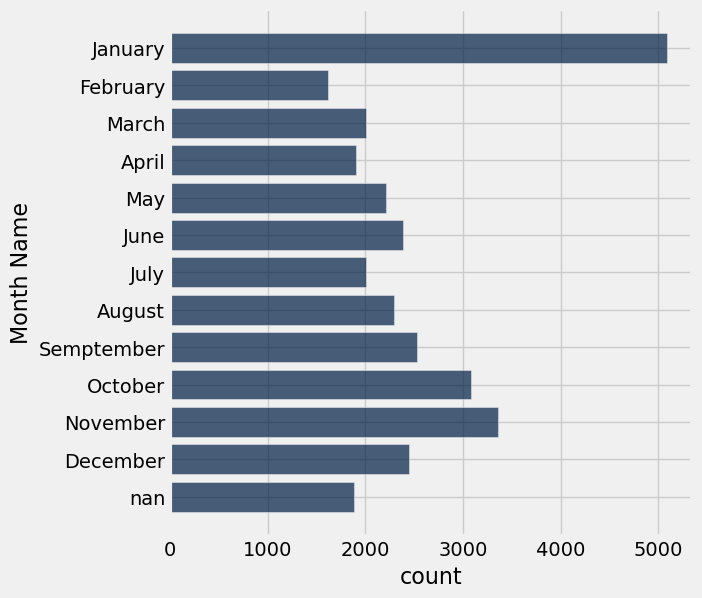

In [22]:
# We can make a neat bar chart based on months and their counts
spotify.group("Month Name").take(make_array(4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2, 12)).barh("Month Name", "count")

## Live Lecture Questions
